In [24]:
%matplotlib notebook
%matplotlib inline
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [30]:
Unemploy_df=pd.read_csv("Resources/state_unemployment.csv")
pop_2019_df=pd.read_csv("Clean_Data_Output/Data.csv")
clean_bar_df=pd.read_csv("Clean_Data_Output/Clean_Data_Final.csv")
unemp_pop_df = pd.merge(Unemploy_df, pop_2019_df, on="State", how="left")
unemp_pop_df.dropna(how='any')
unemp_pop_df.head()

,State,unemployment_rate,Unnamed: 0,Median Income (2019),2019 Population,Population (2019),Total Murders (2019)
0,Alabama,2.7,0,56200,731545,731545,4
1,Alaska,6.0,1,78394,7278717,7278717,69
2,Arizona,4.6,2,70674,3017804,3017804,337
3,Arkansas,3.6,3,54539,39512223,39512223,231
4,California,3.9,4,78105,5758736,5758736,1679


In [3]:
#bottom_five=Unemploy_df.sort_values("unemployment_rate").head(5)
#bottom_five

In [4]:
#U_rate=bottom_five["unemployment_rate"]
#x_axis=bottom_five["states"]
#plt.bar(x_axis, U_rate, color='b', alpha=0.70, align="center")
#plt.xticks(rotation = 90)
#plt.show()

In [5]:
#top_five=Unemploy_df.sort_values("unemployment_rate",ascending=False).head(5)
#top_five

In [6]:
#U_rate=top_five["unemployment_rate"]
#x_axis=top_five["states"]
#plt.bar(x_axis, U_rate, color='r', alpha=0.70, align="center")
#plt.xticks(rotation = 90)
#plt.show()

In [26]:
pop_2019_df.head()
del pop_2019_df["Unnamed: 0"]
del pop_2019_df["Population (2019)"]
pop_2019_df.head()




,State,Median Income (2019),2019 Population,Total Murders (2019)
0,Alabama,"56,200","731,545",4.0
1,Alaska,"78,394","7,278,717",69.0
2,Arizona,"70,674","3,017,804",337.0
3,Arkansas,"54,539","39,512,223",231.0
4,California,"78,105","5,758,736",1679.0


In [27]:
new_pop=pop_2019_df.sort_values(by="Median Income (2019)",ascending=True)
new_pop.dtypes
no_commas=new_pop["Median Income (2019)"].str.replace(",", "").astype(float)
no_commas.dtypes

dtype('float64')

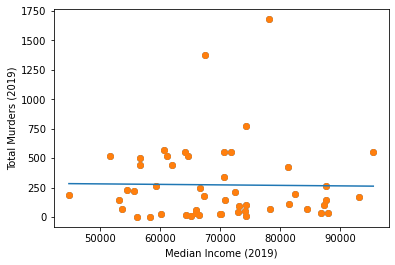

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(no_commas,new_pop["Total Murders (2019)"])
plt.xlabel("Median Income (2019)",fontsize =10)
plt.ylabel("Total Murders (2019)",fontsize =10)
x_values=no_commas
y_values=new_pop["Total Murders (2019)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values)
plt.show()
plt.savefig("Image Output/MedianIncome_Regression.png")

In [29]:
corr_coe=round(st.pearsonr(no_commas,new_pop["Total Murders (2019)"])[0],2)
corr_coe

-0.02

In [35]:
unemp_clean_df = pd.merge(pop_2019_df, clean_bar_df, on="State", how="left")
unemp_clean_df.head()

,Unnamed: 0_x,State,Median Income (2019),2019 Population_x,Population (2019),Total Murders (2019)_x,Unnamed: 0_y,Total Murders (2019)_y,2019 Population_y,Murders Per Capita/Homicide Rate,Unemployment Rate
0,0,Alabama,56200,731545,731545,4,0,4.0,4903185.0,0.00000,2.7
1,1,Alaska,78394,7278717,7278717,69,1,69.0,731545.0,0.00009,6.0
2,2,Arizona,70674,3017804,3017804,337,2,337.0,7278717.0,0.00005,4.6
3,3,Arkansas,54539,39512223,39512223,231,3,231.0,3017804.0,0.00008,3.6
4,4,California,78105,5758736,5758736,1679,4,1679.0,39512223.0,0.00004,3.9


In [36]:
abbrev_list = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
              'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
              'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
              'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
              'VA','WA','WV','WI','WY']

Mincome_df = unemp_clean_df
Mincome_df['Abbreviations'] = abbrev_list
new_Mincome_df= Mincome_df[['Abbreviations','Median Income (2019)','Murders Per Capita/Homicide Rate']]
#unemploy_multibar_df['unemployment_rate'] = (unemploy_multibar_df['unemployment_rate']/100).map('{:.1%}'.format)
new_Mincome_df.head()

,Abbreviations,Median Income (2019),Murders Per Capita/Homicide Rate
0,AL,56200,0.00000
1,AK,78394,0.00009
2,AZ,70674,0.00005
3,AR,54539,0.00008
4,CA,78105,0.00004


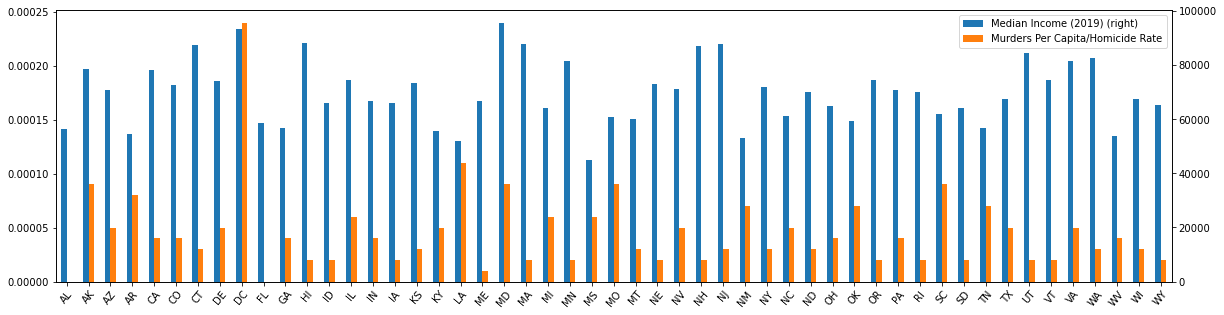

<Figure size 432x288 with 0 Axes>

In [38]:
multi_plot = new_Mincome_df.plot(kind="bar", secondary_y = ['Median Income (2019)'], figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(Mincome_df['Abbreviations'], rotation=50)
#plt.yaxis.set_major_formatter(ticker.PercentFormatter(xmax)

plt.show()
plt.tight_layout()
plt.savefig("Image Output/MedianIncome_bar.png")